In [229]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib
import matplotlib.pyplot as plt 

In [6]:
cwd = os.getcwd()

In [406]:
os.chdir('/Users/DavidJuergens/Desktop/BETO2020/scripts/')


In [407]:
import tfidf_wrapper
from tfidf_wrapper import tfidf_model

In [230]:
goog_fr = '/Users/DavidJuergens/Google Drive File Stream/Shared drives/ChemE NLP Team Drive/Flame Retardants/'

In [414]:
os.chdir(ci_goog)

In [416]:
df_ci = pd.read_csv('corrosion_inhib_link_data.txt')

In [341]:
df_fr = pd.read_excel('flame_retardant_link_data2.xlsx')

In [159]:
ci_goog = '/Users/DavidJuergens/Google Drive File Stream/Shared drives/ChemE NLP Team Drive/Corrosion Inhibitors/'

In [160]:
fr_goog = '/Users/DavidJuergens/Google Drive File Stream/Shared drives/ChemE NLP Team Drive/Flame Retardants/'

In [411]:
# grabbing pub lists

os.chdir(ci_goog)
ci_file = open('cleaned_CIpubs.txt','r')
dirty_ci_file = open('CIpubs.txt','r')
os.chdir(fr_goog)
fr_file = open('cleaned_flame_retardant_texts.txt','r')
dirty_fr_file = open('flame_retardant_texts.txt','r')

In [412]:
# creating pub lists

ci_pubs = []
dirty_ci = []
fr_pubs = []
dirty_fr = []

for pub in ci_file:
    ci_pubs.append(pub)

for pub in fr_file:
    fr_pubs.append(pub)

In [417]:
# lower casing the list

lower_ci_pubs = []
for pub in ci_pubs:
    lower_ci_pubs.append(pub.lower())

In [418]:
df_ci['tfidf score'] = 'NaN'

In [419]:
# create a boolean mask to find those which were successfully entered into the file AND are ranked
msk = (df_ci['success'] == 1) & ((df_ci['DJ score'] >= 0.0) | (df_ci['AJ score'] >= 0.0) | (df_ci['WT score'] >= 0.0) | (df_ci['JO score'] >= 0.0) | (df_ci['AC score'] >= 0.0)) 

In [420]:
# method to create a single column of relevant labeled tf-idf scores that a model can use
# the rule here was if it was ranked 2 by anyone, call it a 2
# and if it was not ranked 2 by anyone, call it a 0

def rank_tfidf2(df):
    
    for i in range(len(df)):
        if df.loc[i,'DJ score'] != 'NaN' and df.loc[i,'WT score'] != 'NaN' and df.loc[i,'AC score'] != 'NaN' and df.loc[i,'JO score'] != 'NaN' and df.loc[i,'AJ score'] != 'NaN':
            
            if df.loc[i,'DJ score'] == 2.0 or df.loc[i,'WT score'] == 2.0 or df.loc[i,'AC score'] == 2.0 or df.loc[i,'JO score'] == 2.0 or df.loc[i,'AJ score'] == 2.0: 
                df.loc[i,'tfidf score'] = 2
                
            elif df.loc[i,'DJ score'] == 1.0 or df.loc[i,'WT score'] == 1.0 or df.loc[i,'AC score'] <= 1.0 or df.loc[i,'JO score'] == 1.0 or df.loc[i,'AJ score'] == 1.0:
                df.loc[i,'tfidf score'] = 1    

            elif df.loc[i,'DJ score'] < 1.0 or df.loc[i,'WT score'] < 1.0 or df.loc[i,'AC score'] < 1.0 or df.loc[i,'JO score'] < 1.0 or df.loc[i,'AJ score'] < 1.0:
                df.loc[i,'tfidf score'] = 0
    return df

In [421]:
# different ranking system? I think I made this to see how it would change training 

def rank_tfidf(df):
    
    for i in range(len(df)):
        if df.loc[i,'DJ score'] != 'NaN' and df.loc[i,'WT score'] != 'NaN' and df.loc[i,'AC score'] != 'NaN' and df.loc[i,'JO score'] != 'NaN' and df.loc[i,'AJ score'] != 'NaN':
            
            if df.loc[i,'DJ score'] == 2.0 or df.loc[i,'WT score'] == 2.0 or df.loc[i,'AC score'] == 2.0 or df.loc[i,'JO score'] == 2.0 or df.loc[i,'AJ score'] == 2.0: 
                df.loc[i,'tfidf score'] = 2

            elif df.loc[i,'DJ score'] <= 1.0 or df.loc[i,'WT score'] <= 1.0 or df.loc[i,'AC score'] <= 1.0 or df.loc[i,'JO score'] <= 1.0 or df.loc[i,'AJ score'] <= 1.0:
                df.loc[i,'tfidf score'] = 0
    return df

In [422]:
df_ci = rank_tfidf(df_ci)

In [423]:
len(df_ci)

18220

In [424]:
len(df_ci[msk])

922

In [426]:
ranks = []
positions = []
texts = []

df = df_ci[msk]

In [427]:
df.head()

,Unnamed: 0,Unnamed: 0.1,number,year,url,DJ score,WT score,AC score,JO score,AJ score,pdf only?,success,full text index,tfidf score
33,33,33,33,1991,https://www-sciencedirect-com.offcampus.lib.wa...,0.0,NaN,NaN,NaN,NaN,NaN,1,11.0,0
39,39,39,39,1992,https://www-sciencedirect-com.offcampus.lib.wa...,NaN,NaN,2.0,NaN,NaN,NaN,1,12.0,2
89,89,89,89,1995,https://www-sciencedirect-com.offcampus.lib.wa...,NaN,NaN,NaN,0.0,NaN,NaN,1,30.0,0
106,106,106,106,1996,https://www-sciencedirect-com.offcampus.lib.wa...,NaN,NaN,1.0,NaN,NaN,*,1,41.0,0
127,127,127,127,1996,https://www-sciencedirect-com.offcampus.lib.wa...,0.0,NaN,NaN,NaN,NaN,NaN,1,59.0,0


In [428]:
for i in range(len(df)):
    ranks.append(df.iloc[i,13])
    positions.append(int(df.iloc[i,12]))

In [429]:
for position in positions:
    texts.append(ci_pubs[position])

In [430]:
# checking lengths to make sure they are the same 
len(texts)

922

In [431]:
len(ranks)

922

In [439]:
# train test split

X_train2, X_test2, y_train2, y_test2 = train_test_split(texts, ranks, test_size=0.20, random_state=42)

In [440]:
# train the model
model2 = tfidf_model(X_train2,y_train2)
model2.train(ngrams = 2)

In [441]:
# make predictions with the model
model.predict(X_test2,y_test2)

Accuracy is 98.91891891891892 %


array([0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 0])

In [435]:
# compare what the model was trying to get 
np.array(y_test2)

array([0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2])

In [443]:
df_success = df_ci[df_ci['success'] == 1]

In [176]:
df_success['model classification'] = pub_predictions

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [177]:
len(df_ci[df_ci['success'] == 1])

17872

In [46]:
len(pub_predictions)

17872

In [48]:
classifications = df_success['model classification'].values

In [49]:
# here we are creating an array, which at each position, is the average rank of the current publication 
# and the 20 that follow it

avg_class = np.array([])
for i in range(len(classifications)-20):
    average = np.mean(classifications[i:i+20])
    avg_class = np.append(avg_class,average)
    

In [50]:
years = df_success['year'].values

In [51]:
years2 = years[:-20]

In [56]:
index = np.arange(len(avg_class))

In [129]:
# creating some arrays for the plot
years_index = np.array([])
years_array = np.array(['91','92','93','94','95','96','97','98','99','00','01','02','03','04','05','06','07','08','09','10','11','\'12','\'13','\'14','\'15','\'16','\'17','\'18','\'19'])
for i in range(1,len(avg_class)):
    if years[i] == years[i-1] + 1:
        years_index = np.append(years_index,i)
    

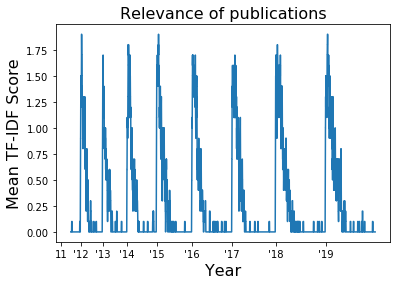

In [204]:
# plotting the average publication rank as a function of it's chronological entrance into the corpus

fig = plt.figure()
ax = plt.axes()
font = {
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
ax.set_xticks(years_index)
ax.set_xticklabels(years_array)
ax.set_title('Relevance of publications',fontdict = font)
ax.set_xlabel('Year',fontdict=font)
ax.set_ylabel('Mean TF-IDF Score',fontdict=font)

ax.plot(index[5700:],avg_class[5700:])
fig.savefig('relevance of publications.png',dpi = 300)

In [205]:
os.getcwd()

'/Volumes/GoogleDrive/Shared drives/ChemE NLP Team Drive/Corrosion Inhibitors'

In [139]:
os.chdir('/Users/DavidJuergens/Desktop/GradSchool/PRG/BETO2020_Local/Reports/Milestone 4.2/')
fig.savefig('publication_relevance_vs_year.jpg',quality = 95,dpi=300)

In [182]:
len(ci_pubs)

17872

In [184]:
len(df_success)

17872

In [185]:
df_success.head()

,Unnamed: 0,Unnamed: 0.1,number,year,url,DJ score,WT score,AC score,JO score,AJ score,pdf only?,success,full text index,tfidf score,model classification
2,2,2,2,1990,https://www-sciencedirect-com.offcampus.lib.wa...,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,NaN,0
6,6,6,6,1990,https://www-sciencedirect-com.offcampus.lib.wa...,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,0
9,9,9,9,1990,https://www-sciencedirect-com.offcampus.lib.wa...,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,NaN,0
11,11,11,11,1990,https://www-sciencedirect-com.offcampus.lib.wa...,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,NaN,0
13,13,13,13,1990,https://www-sciencedirect-com.offcampus.lib.wa...,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,NaN,0


In [195]:
df_success.iloc[1,14]

1.0

In [196]:
with open('rank-0-CIpubs.txt','w') as file:
    for i in range(len(df_success)):
        if df_success.iloc[i,14] == 0:
            file.write(ci_pubs[i])

In [198]:
test = np.array([1,2,3,4,5])
test2 = np.array([6,7,8,9,10])

In [201]:
test = np.vstack((test,test2))

In [202]:
test

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])